# Analyzing Presidential Election With Twitter

Would it have been possible to predict winner of presidential election earlier with Twitter? 


# Setting Up Twitter Developer Account Linked To Profile

## Initialize Connection

In [3]:
import tweepy #Connection to Twitter
import json #Output from Twitter
import time #How the computer is going to see the time

In [4]:
#ConsumerKey, consumer secret, access token, access secret 
ckey = 'MEynE0kRbK0Zxl0JZxbbH2dLb'
csecret = 'viYv8XalQzp643oTMbVmXzF4QLekgDjXm5nCmWmUMEBmn91JR1'
atoken= '862164338936860675-tyzXrNk5yQZRHFacACx8jSNwTKE9uj7'
asecret = 'BAI4pZnsFMKjGyXZfRp4cLxS5PoyADqpNGScnmry932gt'

In [5]:
#Instantiating Objects of Authentication
auth = tweepy.OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

## Testing the Connection

In [9]:
#Create The Actual Interface
api = tweepy.API(auth)

#api.update_status("Hello Updating From iPython")
user = api.me()

In [13]:
print(user.name)
print(user.location)
print(user.friends_count)

Tomoki Lam

0


# Streaming Presidential Election Tweets

In [17]:
# Initializing a listener class that streams Twitter status
class StdOutListener(tweepy.StreamListener):
    def on_data(self,data):
        try:
            with open ('tweets', 'a') as file:
                file.write(data)
                return True
        except BaseException as e:
            print(str(e))
    def on_error(self,status):
        print(status)
        
        
#This handles Twitter authentiication and the connection to Twitter Streaming API
listener = StdOutListener()
stream = tweepy.Stream(auth, listener)

#This line filter Twitter Streams to capture data by the keywords: 'trump', 'hillary'
try:    
    stream.filter(track=['trump','hillary'])
except KeyboardInterrupt:
        print("Twitter Download is interrupted")      

Twitter Download is interrupted


# Exploring Data 

In [18]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

In [23]:
#Get data of Twitter Stream
tweets_data_path = 'tweets'

tweets_data =[]
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
len(tweets_data)

5444

In [24]:
#Sample Twitter Data Received
tweets_data[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed May 10 05:28:05 +0000 2017',
 'display_text_range': [28, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/8…',
    'expanded_url': 'https://twitter.com/i/web/status/862177401559801856',
    'indices': [117, 140],
    'url': 'https://t.co/lRWSYNQUUm'}],
  'user_mentions': [{'id': 329276155,
    'id_str': '329276155',
    'indices': [0, 9],
    'name': 'D Young',
    'screen_name': 'statto99'},
   {'id': 14157134,
    'id_str': '14157134',
    'indices': [10, 17],
    'name': 'Robert Peston',
    'screen_name': 'Peston'},
   {'id': 87818409,
    'id_str': '87818409',
    'indices': [18, 27],
    'name': 'The Guardian',
    'screen_name': 'guardian'}]},
 'extended_tweet': {'display_text_range': [28, 168],
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 329276155,
     'id_str': '329276155',
     'indices': [0, 9],
     'name'

In [25]:
#How to parse out certain key from json
tweets_data[0]['text']

'@statto99 @Peston @guardian The machine behind Brexit and Trump is far, far more influential and cynical than a loc… https://t.co/lRWSYNQUUm'

In [26]:
from datetime import datetime

In [33]:
#Pass in a Tweet JSON Data (tweet) and the key to get (element)
def getText(tweet, element):
    try:
        return tweet[element]
    except KeyError:
        pass
    
tweetsDF = pd.DataFrame()
tweetsDF['text'] =[getText(tweet, 'text') for tweet in tweets_data]
tweetsDF['lang'] = [getText(tweet,'lang') for tweet in tweets_data]
tweetsDF['created_at'] = [getText(tweet,'created_at') for tweet in tweets_data]
tweetsDF['created_at'] = pd.to_datetime(tweetsDF['created_at'],errors='ignore')
tweetsDF.set_index('created_at',inplace=True)

In [31]:
tweetsDF.head()

,text,lang
created_at,,
2017-05-10 05:28:05,@statto99 @Peston @guardian The machine behind...,en
2017-05-10 05:28:05,@RobinH2222 @Rosie Six months ago liberals bla...,en
2017-05-10 05:28:05,RT @JoyAnnReid: Meanwhile... https://t.co/S6xB...,en
2017-05-10 05:28:05,"Donald Trump fires FBI Director James Comey, s...",en
2017-05-10 05:28:05,@nytimes this letter proves Trump is not under...,en


## Removing Empty Texts 

In [37]:
tweetsDF.dropna(axis=0, how="any", inplace=True)
tweetsDF.isnull().sum()

text    0
lang    0
dtype: int64

## What Languages Are Used in Twitter Data Feed?

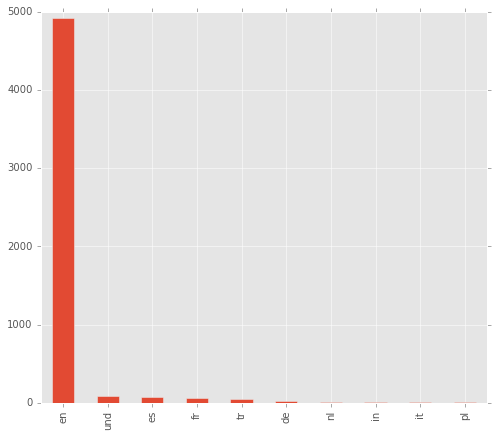

In [38]:
tweets_by_lang = tweetsDF['lang'].value_counts()
tweets_by_lang.head(10).plot(kind="bar")

English is clearly the dominant language used in Tweet Data. This will make it easier to analyze.